In [129]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import pandas as pd
%matplotlib inline
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            for j in range(len(W)):
                W[j] += X[i][j]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            for j in range(len(W)):
                W[j] -= X[i][j]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 250):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


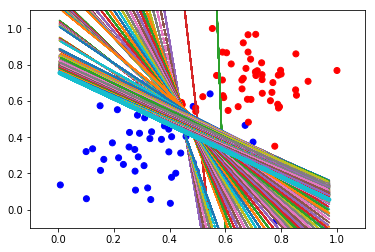

In [130]:
df = pd.read_csv('perceptron_data.csv',header=None)

# Coordinate Pairs
xypairs = df.as_matrix(columns=df.columns[0:2])
# Labels
labels = df.as_matrix(columns=df.columns[2:])
# Color Scheme Blue-Red
cm = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

boundary_lines = trainPerceptronAlgorithm(xypairs, labels)
plt.scatter(df[0], df[1], c=df[2], cmap=cm)
for i, line in enumerate(boundary_lines):
    y = line[0]*x + line[1]
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    if i != len(boundary_lines) - 1:
        plt.plot(x, y, linestyle='--')  # dashed
    else:
        plt.plot(x, y,linewidth=4,linestyle='-')  # solid
